# Homework 3
* Generate dataset using make_classification function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters
 * n_informative = 5
 * class_sep = 2
 * random_state = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep = 2, random_state = 42)

In [3]:
df = pd.DataFrame(np.c_[X, y])
df.shape

(10000, 9)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
dtypes: float64(9)
memory usage: 703.2 KB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744,0.499400
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276,0.500025
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545,0.000000
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088,0.000000
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192,0.000000
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999,1.000000
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690,1.000000


In [5]:
# Check duplicate values and missing data
df.duplicated().sum()

0

In [7]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
df.isin(['?']).sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [12]:
df.groupby(by=8).count()

,0,1,2,3,4,5,6,7
8,,,,,,,,
0.0,5006,5006,5006,5006,5006,5006,5006,5006
1.0,4994,4994,4994,4994,4994,4994,4994,4994


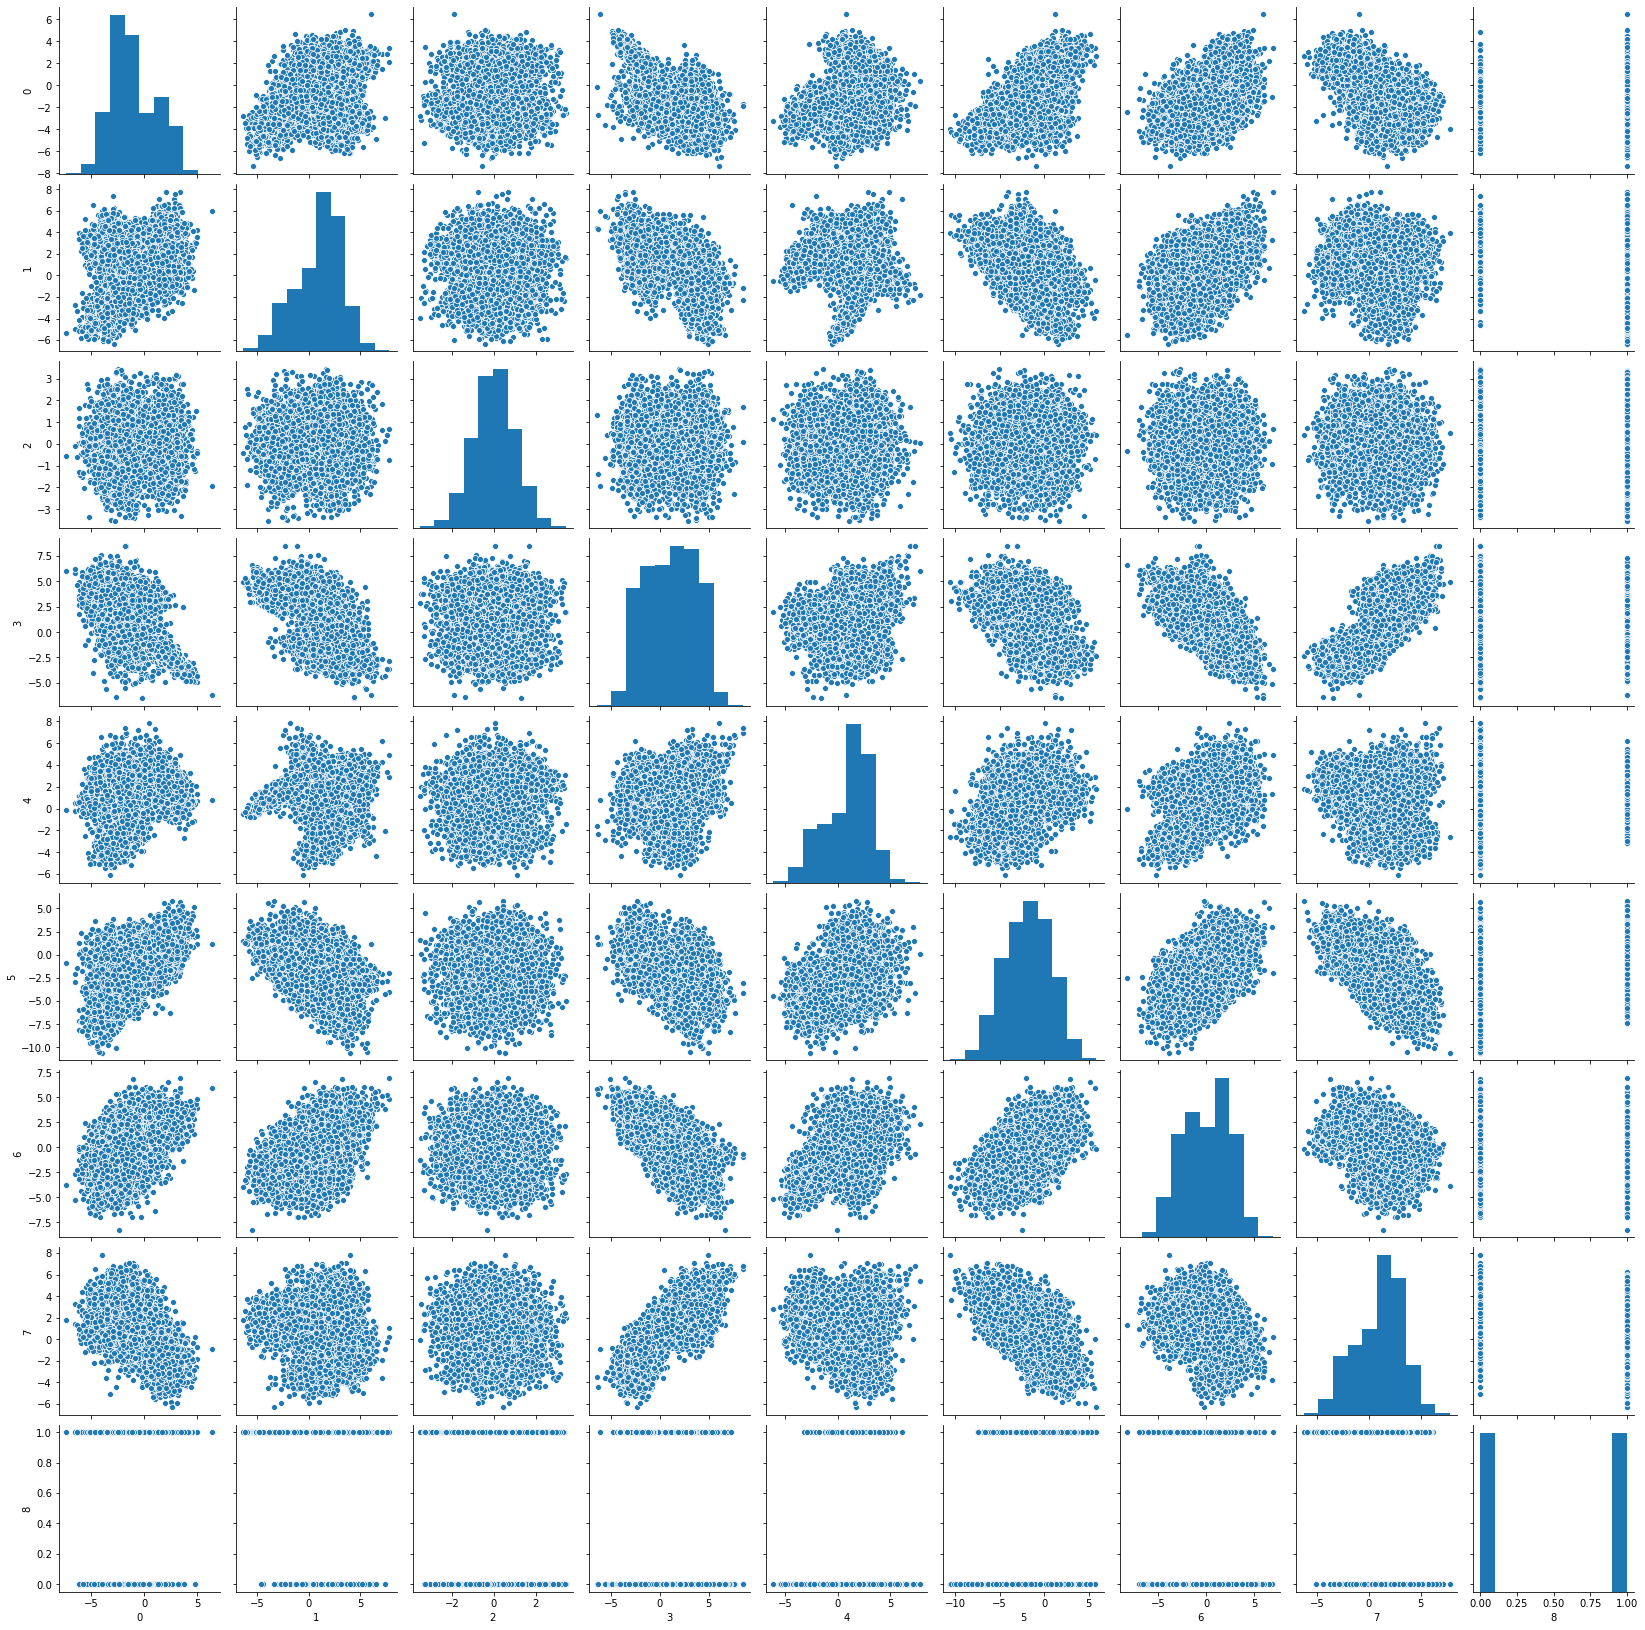

In [9]:
import seaborn as sns
sns.pairplot(df)

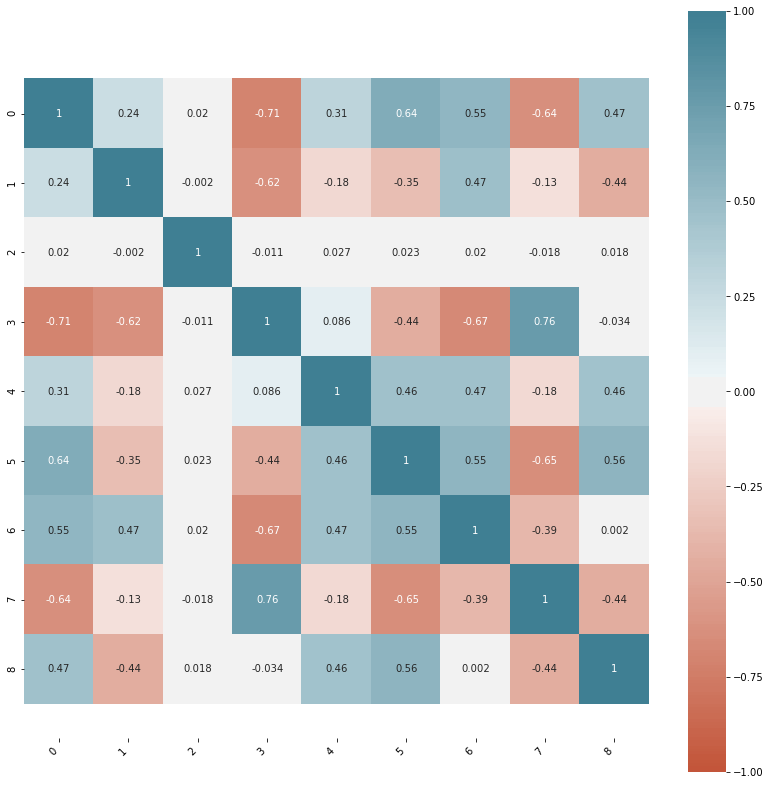

In [13]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [14]:
# Outlier Detection
from scipy import stats
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.00566284, 1.15220659,
        0.99880072],
       [1.21562472, 1.62265494, 0.52187207, ..., 1.40338979, 0.51777165,
        1.00120072],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.48387509, 0.35998293,
        0.99880072],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.53475377, 0.55105502,
        1.00120072],
       [0.08336999, 0.15830524, 0.83152777, ..., 0.99626339, 0.9651887 ,
        1.00120072],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.24352619, 1.01322073,
        0.99880072]])

In [16]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.00566284, 1.15220659,
        0.99880072],
       [1.21562472, 1.62265494, 0.52187207, ..., 1.40338979, 0.51777165,
        1.00120072],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.48387509, 0.35998293,
        0.99880072],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.53475377, 0.55105502,
        1.00120072],
       [0.08336999, 0.15830524, 0.83152777, ..., 0.99626339, 0.9651887 ,
        1.00120072],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.24352619, 1.01322073,
        0.99880072]])

In [17]:
len(np.where(z > 3)[0])

59

In [19]:
outliers = list(set(np.where(z > 3)[0]))
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

,index,0,1,2,3,4,5,6,7,8
0,0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0
...,...,...,...,...,...,...,...,...,...,...
9937,9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0.0
9938,9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0.0
9939,9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1.0
9940,9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1.0


In [21]:
from sklearn.model_selection import train_test_split

# Locate features and label
X, y = new_df.iloc[: , :-1], new_df.iloc[: , -1]

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42) #hiperparametrelerde bir tunning yapman gerekebilir.
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


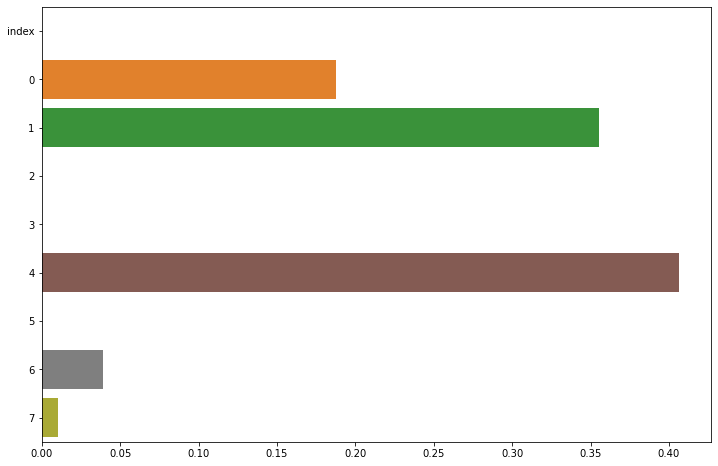

In [23]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

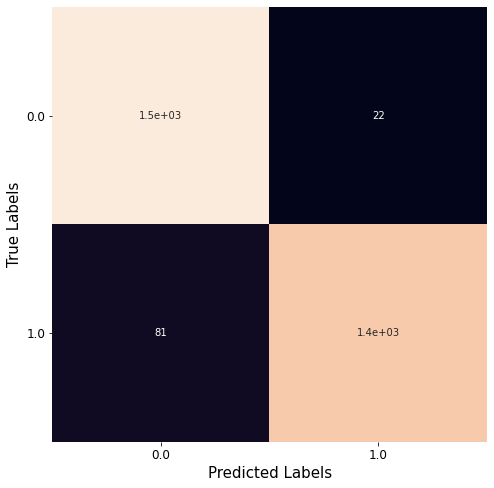

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

categories = [0.0, 1.0]
pred = clf.predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [28]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1527
         1.0       0.98      0.94      0.96      1456

    accuracy                           0.97      2983
   macro avg       0.97      0.96      0.97      2983
weighted avg       0.97      0.97      0.97      2983



In [29]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9665900447816028
Recall = 0.9649803986125204
Accuracy = 0.9654710023466309
F1 Score = 0.9654052986531725


In [38]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27, num_class = 2)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

D:\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 2000}
Mean of the cv scores is 0.986492
Train Score 0.999569
Test Score 0.990613
Seconds used for refitting the best model on the train dataset: 47.776801


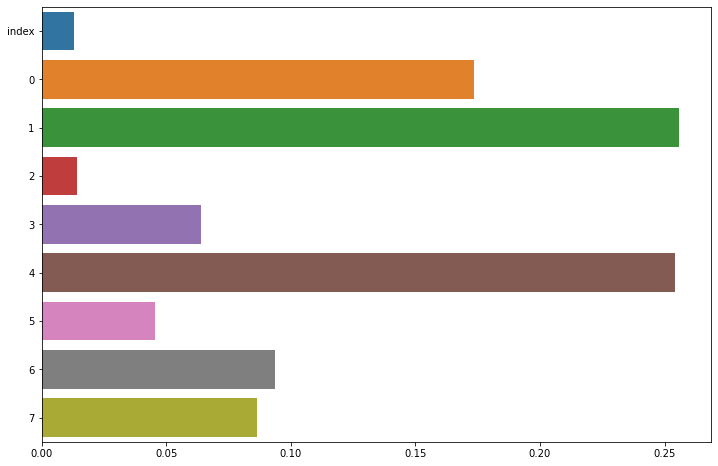

In [42]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.best_estimator_.feature_importances_ #best_estimator_
sns.barplot(x=importance, y=X.columns)
plt.show()

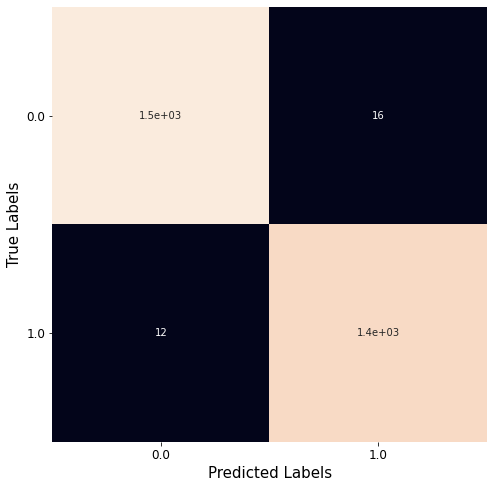

In [40]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [43]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9665900447816028
Recall = 0.9649803986125204
Accuracy = 0.9654710023466309
F1 Score = 0.9654052986531725


# RESULT

* XGBClassifier algoritm used with GridSearchCV is much more feasible than DecisionTreeClassifier used alone if we compare their confusion matrixes.

* While DecisionTree has 103 false predictions, the XGBClassifier has 28.

* With DecisionTree 
 * Accuracy of train: 0.9637879005604254
 * Accuracy of test: 0.9654710023466309
* With XGBClassifier 
 * Train Score 0.999569
 * Test Score 0.990613
* There is no underfitting or overfitting problem for this algorithm since it has training and test scores that are close to each other.